In [111]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2_score
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt 


%matplotlib inline


In [112]:
TEST_origin = './test.csv'
TRAIN_origin = './train.csv'

In [113]:
train_df = pd.read_csv(TRAIN_origin)
test_df = pd.read_csv(TEST_origin) 
train_df.tail(3)


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [114]:
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [115]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [116]:
corr_matrix = train_df.corr().round(2)
corr_matrix

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.00,0.01,-0.01,-0.01,0.02,0.02,0.00,-0.01,0.01,0.02,-0.00,-0.00,-0.01,-0.00,0.00,-0.01,0.01
DistrictId,0.01,1.00,0.07,-0.03,-0.02,0.04,-0.12,-0.15,0.01,0.07,0.25,0.17,0.14,0.30,0.31,0.17,0.27
Rooms,-0.01,0.07,1.00,0.66,0.13,0.01,-0.00,-0.03,-0.01,-0.03,0.08,0.07,0.01,0.04,0.06,0.05,0.55
Square,-0.01,-0.03,0.66,1.00,0.20,0.01,0.11,0.08,-0.01,-0.06,-0.07,-0.04,0.04,-0.04,-0.02,0.02,0.52
LifeSquare,0.02,-0.02,0.13,0.20,1.00,-0.00,0.02,0.03,-0.00,-0.02,-0.05,-0.04,0.01,-0.03,-0.02,-0.01,0.08
KitchenSquare,0.02,0.04,0.01,0.01,-0.00,1.00,-0.01,0.00,0.00,-0.01,0.04,0.04,-0.02,0.01,0.04,0.01,0.03
Floor,0.00,-0.12,-0.00,0.11,0.02,-0.01,1.00,0.42,0.00,-0.02,-0.04,-0.02,-0.00,-0.14,-0.07,0.02,0.13
HouseFloor,-0.01,-0.15,-0.03,0.08,0.03,0.00,0.42,1.00,-0.00,-0.00,-0.02,0.01,-0.01,-0.14,-0.07,0.03,0.09
HouseYear,0.01,0.01,-0.01,-0.01,-0.00,0.00,0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.01,0.01,0.00,0.00
Ecology_1,0.02,0.07,-0.03,-0.06,-0.02,-0.01,-0.02,-0.00,0.00,1.00,0.03,0.01,-0.12,-0.04,0.03,-0.08,-0.06


In [117]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [118]:
# train_df.DistrictId = train_df.DistrictId.tolist()
# train_df['DistrictId'] = train_df['DistrictId'].apply(pd.to_numeric, downcast = 'float', errors="coerce")
train_df['DistrictId'] = train_df['DistrictId'].astype(int)
test_df['DistrictId'] = test_df['DistrictId'].astype(int)

In [119]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters =3, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()
# dist_sh_df = train_df.loc[train_df['DistrictId':'Shops_1'] ]
feats = ['DistrictId','Shops_1' ]
dist_sh_df = train_df [feats]
test_dist_sh_df = test_df[feats]
sk_dist_sh_df = scaler_1.fit_transform(dist_sh_df)
test_dist_sh_df_sk = scaler_1.fit_transform(test_dist_sh_df)

km_distr = model.fit_predict(sk_dist_sh_df )
km_distr

array([1, 1, 1, ..., 0, 1, 0])

In [120]:
model.inertia_

288.2828436586775

In [121]:
T_km_distr = model.fit_predict(test_dist_sh_df_sk )
T_km_distr

array([2, 2, 2, ..., 0, 1, 2])

In [122]:
model.inertia_

144.27371650724842

In [123]:
# inertia_arr = []
# for i in range (2,8):
#     temp_model = KMeans(n_clusters=i, random_state=100)
#     temp_model.fit(sk_dist_sh_df)
#     temp_inertia = temp_model.inertia_
#     inertia_arr.append(temp_inertia)
# plt.plot([i for i in range (2,8)], inertia_arr)


In [124]:
train_df['shops_distr'] = km_distr
test_df['shops_distr'] = T_km_distr

In [125]:

# train_df = train_df.drop('Id',axis=1)

# test_df = test_df.drop('Id',axis=1)


In [126]:
#  test_df.info()

In [127]:
#  train_df.info()

### Обзор целевой переменной


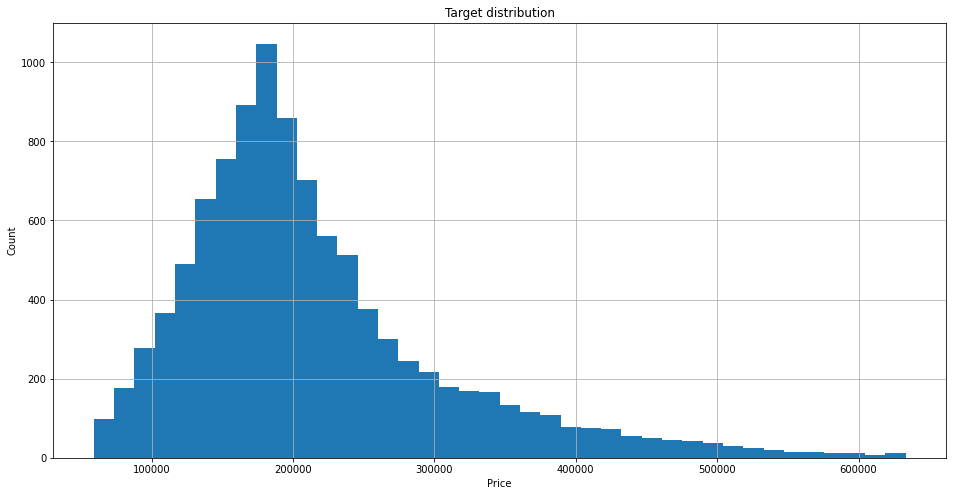

In [128]:
plt.figure (figsize=(16,8))
train_df['Price'].hist(bins = 40)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title ('Target distribution')
plt.show()

### Количественные переменные

In [129]:
train_df.describe()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,shops_distr
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399,0.845900
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865,0.611221
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942,0.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879,1.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171,1.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,2.000000


### Качественные переменные.

In [130]:
df_object_features = train_df.select_dtypes(include='object')
df_object_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [131]:
df_object_featuresT = test_df.select_dtypes(include='object')
df_object_featuresT.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,A
2,B,B,B
3,B,B,B
4,B,B,B


In [132]:

train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)


In [133]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int32  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Social_1       5000 non-null   int64  
 11  Social_2       5000 non-null   int64  
 12  Social_3       5000 non-null   int64  
 13  Healthcare_1   2623 non-null   float64
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  shops_distr    5000 non-null   int32  
 17  Ecology_2_A    5000 non-null   uint8  
 18  Ecology_

#### Ecology_2

In [134]:
# Ecology_2_df = train_df.loc[:,'Ecology_2_A':'Ecology_2_B' ]
# from sklearn.decomposition import PCA
# pca = PCA(n_components =1)
# pca_Ecology_2 = pca.fit_transform(Ecology_2_df)
# pca_Ecology_2


#### Ecology_3

In [135]:
# train_df['Ecology_3'] = train_df['Ecology_3'].fillna(0)
# train_df['Ecology_3'].value_counts()
# train_df = pd.get_dummies(train_df['Ecology_3'])
# Ecology_3_df = train_df.loc[:,'Ecology_3_A':'Ecology_3_B' ]
# from sklearn.decomposition import PCA
# pca = PCA(n_components =1)
# pca_Ecology_3 = pca.fit_transform(Ecology_3_df)
# pca_Ecology_3



#### Shops_2

In [136]:
# train_df['Shops_2'] = train_df['Shops_2'].fillna(0)
# train_df['Shops_2'].value_counts()
# Shops_2_df = train_df.loc[:,'Shops_2_A':'Shops_2_B' ]
# from sklearn.decomposition import PCA
# pca = PCA(n_components =1)
# pca_Shops_2 = pca.fit_transform(Shops_2_df)
# pca_Shops_2


###  Предобработка данных


In [137]:
train_df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Price               0
shops_distr         0
Ecology_2_A         0
Ecology_2_B         0
Ecology_3_A         0
Ecology_3_B         0
Shops_2_A           0
Shops_2_B           0
dtype: int64

### Стандартизация признаков

In [138]:
# scaler = StandardScaler()
# train_df_scl = scaler.fit_transform(train_df)
# не эффективно

#### District

In [139]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int32  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   5202 non-null   float64
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Price          10000 non-null  float64
 17  shops_distr    10000 non-null  int32  
 18  Ecology

In [140]:
district_size = train_df['DistrictId'].value_counts().reset_index()
district_size.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   index       205 non-null    int64
 1   DistrictId  205 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [141]:
district_size.rename(columns={'index': 'DistrictId', 'DistrictId':'DistritSize'}, inplace= True)
train_df = pd.merge(train_df, district_size, on = 'DistrictId', how = 'left')
# train_df.info()
# district_size.head()

In [142]:
district_size = test_df['DistrictId'].value_counts().reset_index()
district_size.rename(columns={'index': 'DistrictId', 'DistrictId':'DistritSize'}, inplace= True)
test_df = pd.merge(test_df, district_size, on = 'DistrictId', how = 'left')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int32  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Social_1       5000 non-null   int64  
 11  Social_2       5000 non-null   int64  
 12  Social_3       5000 non-null   int64  
 13  Healthcare_1   2623 non-null   float64
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  shops_distr    5000 non-null   int32  
 17  Ecology_2_A    5000 non-null   uint8  
 18  Ecology_

In [143]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,shops_distr,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,DistritSize
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,1,1,2,0,1,0,1,0,1,46
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,...,0,0,2,0,1,0,1,1,0,122
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,...,0,1,2,0,1,0,1,0,1,391
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,0,0,2,0,1,0,1,0,1,264
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,...,0,6,0,0,1,0,1,0,1,61


#### Rooms

In [144]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [145]:
mode_r = train_df['Rooms'].mode()[0]
train_df.loc[train_df['Rooms']<=1,'Rooms'] =mode_r 

train_df.loc[train_df['Rooms']>=6,'Rooms'] = mode_r 
# test
test_df.loc[test_df['Rooms']<=1,'Rooms'] = mode_r 

test_df.loc[test_df['Rooms']>=6 ,'Rooms'] = mode_r 

#### Square, LifeSquare, KitchenSquare

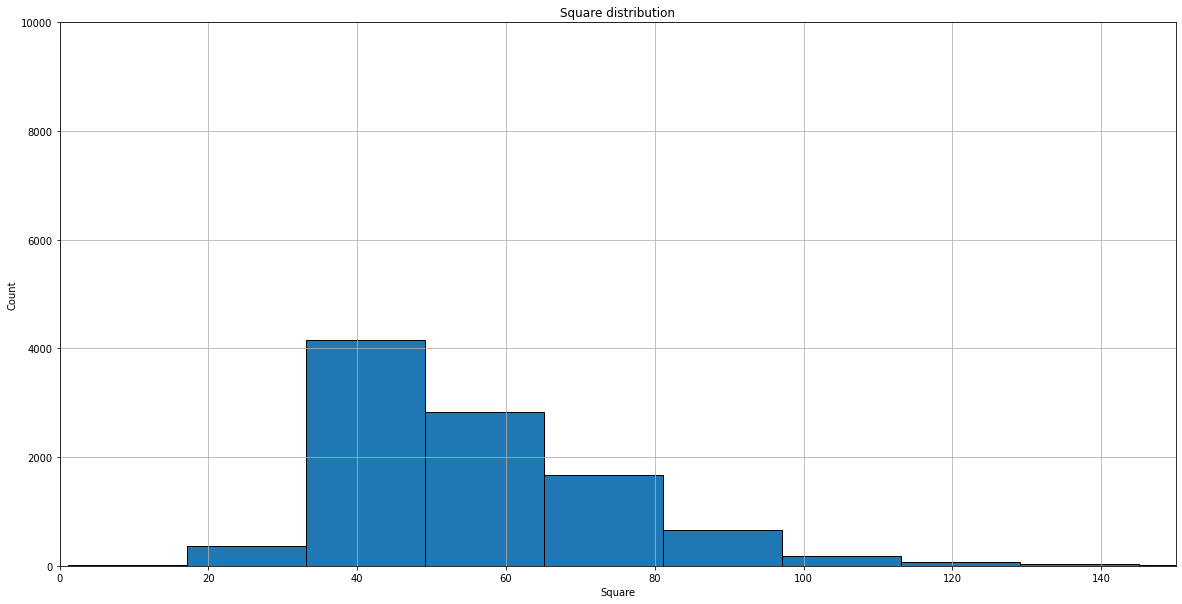

In [146]:
# train_df['Square'].value_counts()
plt.figure (figsize=(20,10))
plt.axis([0,150,0,10000])
train_df['Square'].hist(bins = 40, edgecolor = 'black')
# train_df['LifeSquare'].hist(bins = 40, edgecolor = 'black')
# train_df['KitchenSquare'].hist(bins = 40, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Square')

plt.title ('Square distribution')
# print(hist_info)
plt.show()

По гистограмме видно, что основное количество площадей распределено в диапозоне от 25 до 120 метров.

In [147]:
test_df['Square'].describe()

count    5000.000000
mean       56.449500
std        19.092787
min         1.378543
25%        41.906231
50%        52.921340
75%        66.285129
max       223.453689
Name: Square, dtype: float64

In [148]:
# train_df[train_df['Square']>120].shape

In [149]:
# train_df[train_df['Square']<25].shape

In [150]:


# train_df.loc[train_df['Square']>100,'Square'] = 100
# train_df.loc[train_df['Square']<25,'Square'] = 25

# test_df.loc[test_df['Square']>100,'Square'] = 100
# test_df.loc[test_df['Square']<25,'Square'] = 25



In [151]:
train_df.loc[(train_df['Square']<15) | (train_df['Square']>300), 'Square'] = train_df['Square'].median()
test_df.loc[(test_df['Square']<15) | (test_df['Square']>300), 'Square'] = train_df['Square'].median()

In [152]:
train_df['square_per_meter'] = train_df['Price'] / train_df['Square']
train_df['square_per_meter'].describe()

count    10000.000000
mean      3891.739716
std       1251.728243
min        752.588644
25%       2916.973642
50%       3907.999942
75%       4690.526670
max      11854.652892
Name: square_per_meter, dtype: float64

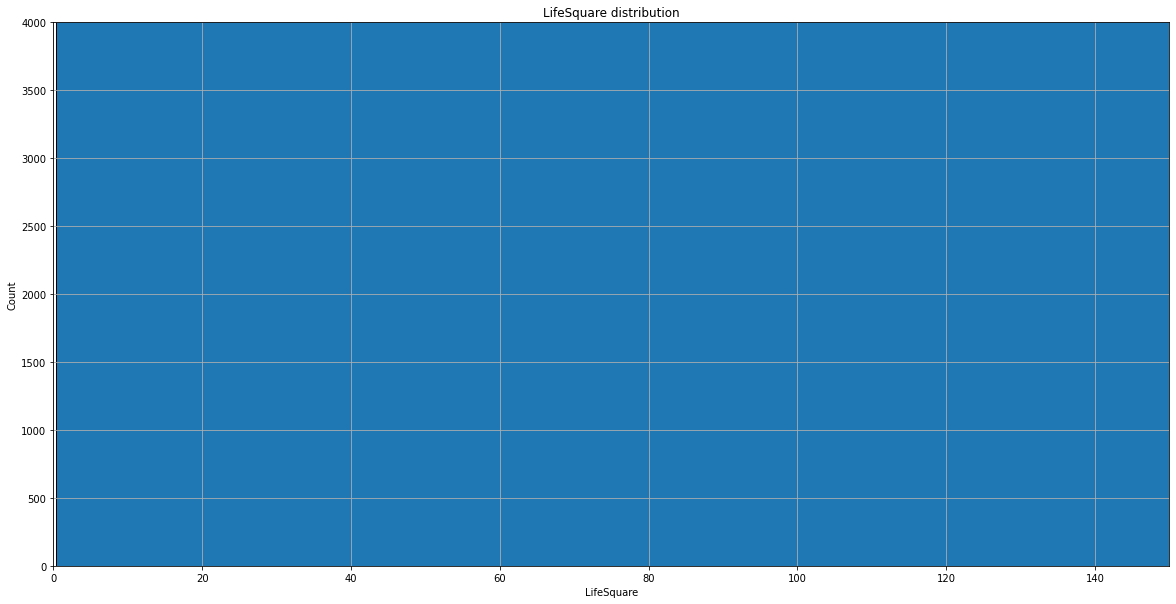

In [153]:
# LifeSquare
plt.figure (figsize=(20,10))
plt.axis([0,150,0,4000])

train_df['LifeSquare'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('LifeSquare')

plt.title ('LifeSquare distribution')
# print(hist_info)
plt.show()

In [154]:

test_df['LifeSquare'].describe()

count    3959.000000
mean       36.158810
std        17.825287
min         0.333490
25%        23.092026
50%        32.925087
75%        45.174091
max       303.071094
Name: LifeSquare, dtype: float64

In [155]:
# median_lsq = train_df['LifeSquare'].median()
# train_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare']= 0
# test_df.loc[test_df['LifeSquare'].isna(), 'LifeSquare']= 0
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['Square'].median()
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['Square'].median()

In [156]:
train_df.loc[train_df['Square']<train_df['LifeSquare'],'LifeSquare'] = train_df['Square'] - train_df['KitchenSquare'] 
test_df.loc[test_df['Square']<test_df['LifeSquare'],'LifeSquare'] = test_df['Square'] - test_df['KitchenSquare'] 
# test_df.loc[test_df['Square']<test_df['LifeSquare'],'Square'] = median_sq


In [157]:
# train_df.loc[train_df['LifeSquare']>80,'LifeSquare'] = median_lsq
# test_df.loc[test_df['LifeSquare']>80,'LifeSquare'] = median_lsq
# train_df.loc[train_df['LifeSquare']<20,'LifeSquare'] = median_lsq
# test_df.loc[test_df['LifeSquare']<20,'LifeSquare'] = median_lsq
# train_df.loc[train_df['LifeSquare']== 0,'LifeSquare'] = median_lsq
# test_df.loc[test_df['LifeSquare']== 0,'LifeSquare'] = median_lsq
train_df.loc[train_df['LifeSquare']>80,'LifeSquare'] = 80
test_df.loc[test_df['LifeSquare']>80,'LifeSquare'] = 80
# train_df.loc[train_df['LifeSquare']<20,'LifeSquare'] = 20
# test_df.loc[test_df['LifeSquare']<20,'LifeSquare'] = 20

In [158]:
# train_df.loc[train_df['LifeSquare']== 0,'LifeSquare'] = median_lsq
# test_df.loc[test_df['LifeSquare']== 0,'LifeSquare'] = median_lsq


In [159]:
# train_df[train_df['LifeSquare']<15].shape


In [160]:
train_df.loc[train_df['LifeSquare']<15,'LifeSquare'] = 12
test_df.loc[test_df['LifeSquare']<15,'LifeSquare'] = 12

In [161]:
# проверяем насколько изменились значения выборки
# train_df['LifeSquare'].describe()

In [162]:
# # KitchenSquare
# plt.figure (figsize=(20,10))
# plt.axis([0,50,0,15000])

# train_df['KitchenSquare'].hist(bins = 40, edgecolor = 'black')


# plt.ylabel('Count')
# plt.xlabel('KitchenSquare')

# plt.title ('KitchenSquare distribution')
# # print(hist_info)
# plt.show()

In [163]:
test_df['KitchenSquare'].describe()

count    5000.000000
mean        5.976800
std         9.950018
min         0.000000
25%         1.000000
50%         6.000000
75%         9.000000
max       620.000000
Name: KitchenSquare, dtype: float64

In [164]:
# train_df[train_df['KitchenSquare']>20].shape

In [165]:
# median_ks = train_df['KitchenSquare'].median()
# train_df.loc[train_df['LifeSquare']<train_df['KitchenSquare'],'KitchenSquare'] = train_df['Square'] - train_df['LifeSquare'] 

# test_df.loc[test_df['LifeSquare']<test_df['KitchenSquare'],'KitchenSquare'] = 9
# train_df.loc[train_df['KitchenSquare']>10,'KitchenSquare'] = median_ks 
# train_df.loc[train_df['KitchenSquare']<3,'KitchenSquare'] = median_ks 
# test_df.loc[test_df['KitchenSquare']>10,'KitchenSquare'] = median_ks 
# test_df.loc[test_df['KitchenSquare']<3,'KitchenSquare'] = median_ks 

In [166]:
train_df.loc[train_df['KitchenSquare']<4, 'KitchenSquare'] = 4
test_df.loc[test_df['KitchenSquare']<4, 'KitchenSquare'] = 4
train_df.loc[train_df['KitchenSquare']>train_df['LifeSquare'], 'KitchenSquare'] = train_df['KitchenSquare'].median()
test_df.loc[test_df['KitchenSquare']>test_df['LifeSquare'], 'KitchenSquare'] = train_df['KitchenSquare'].median()

#### Дополнительные признаки по площадям

##### проверка эффективности ввода дополнительных признаков

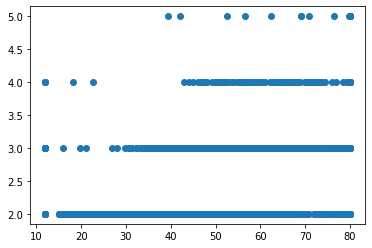

In [167]:
import matplotlib.pyplot as plt 
# plt.scatter(train_df['Social_2'],train_df['Social_2'])
# plt.scatter(train_df['Social_1'],train_df['Social_3'])
plt.scatter(train_df['LifeSquare'],train_df['Rooms'])

In [168]:
from sklearn.cluster import KMeans
model_2 = KMeans(n_clusters =10, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()
# dist_sh_df = train_df.loc[train_df['DistrictId':'Shops_1'] ]
feats_2 = ['LifeSquare','Rooms' ]
sqare_un = train_df [feats_2]
# train_sqare_un = train_df[feats]
sk_sqare_un = scaler_1.fit_transform(sqare_un)
# train_sqare_un_sk = scaler_1.fit_transform(test_dist_sh_df)

Unionsqare = model_2.fit_predict(sk_sqare_un )
Unionsqare

array([2, 1, 6, ..., 1, 1, 1])

In [169]:
model_2.inertia_

28.060785978072833

In [170]:
train_df['Unionsqare'] = Unionsqare


In [171]:
train_df['index_square'] = train_df['Square'] / train_df['KitchenSquare']
# train_df['index_square'] = (train_df['LifeSquare'] + train_df['KitchenSquare'])/train_df['Square']
# train_df.loc[train_df['index_square']>1,'index_square'] = 1 
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,DistritSize,square_per_meter,Unionsqare,index_square
0,11809,27,3.0,115.027311,52.513310,10.0,4,10.0,2014,0.075424,...,0,1,0,1,0,1,851,2651.708272,2,11.502731
1,3013,22,2.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,0,1,0,1,0,1,78,4462.045990,1,4.979065
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,1,0,1,0,1,652,3600.596698,6,7.834222
3,2352,1,2.0,40.409907,39.409907,4.0,10,22.0,1977,0.007122,...,0,1,0,1,0,1,652,4160.019670,0,10.102477
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,1,0,1,0,1,89,5351.088794,0,7.142785


### Floor, HouseFloor

In [172]:
train_df['Floor'].describe()

count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64

In [173]:
# median_fl = train_df['Floor'].median()
# train_df.loc[train_df['Floor']== 0,'Floor'] = median_fl

# test_df.loc[test_df['Floor']== 0,'Floor'] = median_fl

In [174]:
train_df.loc[(train_df['HouseFloor']<2) | (train_df['HouseFloor']>50), 'HouseFloor'] = train_df['HouseFloor'].mode()[0]
test_df.loc[(test_df['HouseFloor']<2) | (test_df['HouseFloor']>50), 'HouseFloor'] = train_df['HouseFloor'].mode()[0]

train_df.loc[train_df['Floor']>train_df['HouseFloor'], 'Floor'] = train_df['Floor']
test_df.loc[test_df['Floor']>test_df['HouseFloor'], 'Floor'] = test_df['Floor']

### HouseYear

In [175]:
train_df['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [176]:
# median_hy = train_df['HouseYear'].median()
# train_df.loc[train_df['HouseYear']== 0,'HouseYear'] =median_hy

# train_df.loc[train_df['HouseYear']<1974,'HouseYear'] = median_hy
# train_df.loc[train_df['HouseYear']>2001,'HouseYear'] = median_hy
# test_df.loc[test_df['HouseYear']== 0,'HouseYear'] =median_hy

# test_df.loc[test_df['HouseYear']<1974,'HouseYear'] = median_hy
# test_df.loc[test_df['HouseYear']>2001,'HouseYear'] = median_hy

train_df.loc[train_df['HouseYear']>2021, 'HouseYear'] = train_df['HouseYear'].median()
test_df.loc[test_df['HouseYear']>2021, 'HouseYear'] = test_df['HouseYear'].median()

### Social

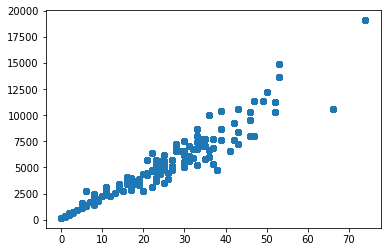

In [177]:
import matplotlib.pyplot as plt 
# plt.scatter(train_df['Social_2'],train_df['Social_2'])
# plt.scatter(train_df['Social_1'],train_df['Social_3'])
plt.scatter(train_df['Social_1'],train_df['Social_2'])

In [178]:
train_df['Social_2'].describe()

count    10000.000000
mean      5352.157400
std       4006.799803
min        168.000000
25%       1564.000000
50%       5285.000000
75%       7227.000000
max      19083.000000
Name: Social_2, dtype: float64

In [179]:
median_s_2 = train_df['Social_2'].median()
train_df.loc[train_df['Social_2']<1500,'Social_2'] =median_s_2
train_df.loc[train_df['Social_2']>8000,'Social_2'] =median_s_2
test_df.loc[test_df['Social_2']<1500,'Social_2'] =median_s_2
test_df.loc[test_df['Social_2']>8000,'Social_2'] =median_s_2

In [180]:
train_df['Social_1'].describe()

count    10000.000000
mean        24.687000
std         17.532614
min          0.000000
25%          6.000000
50%         25.000000
75%         36.000000
max         74.000000
Name: Social_1, dtype: float64

In [181]:
median_s_1 = train_df['Social_1'].median()
train_df.loc[train_df['Social_1']<6,'Social_1'] =median_s_1
train_df.loc[train_df['Social_1']>36,'Social_1'] =median_s_1

test_df.loc[test_df['Social_1']<6,'Social_1'] =median_s_1
test_df.loc[test_df['Social_1']>36,'Social_1'] =median_s_1

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
feats2 = ['Social_1','Social_2']
social_df = train_df [feats2]

social_df_ckld = scaler.fit_transform(social_df)

#test

T_social_df = test_df [feats2]

T_social_df_ckld = scaler.fit_transform(T_social_df )

In [183]:
from sklearn.decomposition import PCA
pca = PCA(n_components =1)
pca_social = pca.fit_transform(social_df_ckld)
pca_social
# pca.explained_variance_ratio_

array([[ 2.47095526],
       [-1.15648398],
       [-1.02724361],
       ...,
       [ 0.8426549 ],
       [-0.15129684],
       [-0.15129684]])

In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components =1)
pca_social_T = pca.fit_transform(T_social_df_ckld)
pca_social_T

array([[ 0.40638796],
       [-0.14580777],
       [ 3.29992779],
       ...,
       [-1.08842962],
       [-2.35071119],
       [-0.14580777]])

In [185]:
train_df['PSA_social1_2'] = pca_social
test_df['PSA_social1_2'] = pca_social_T

In [186]:
# train_df['Social_3'].describe()


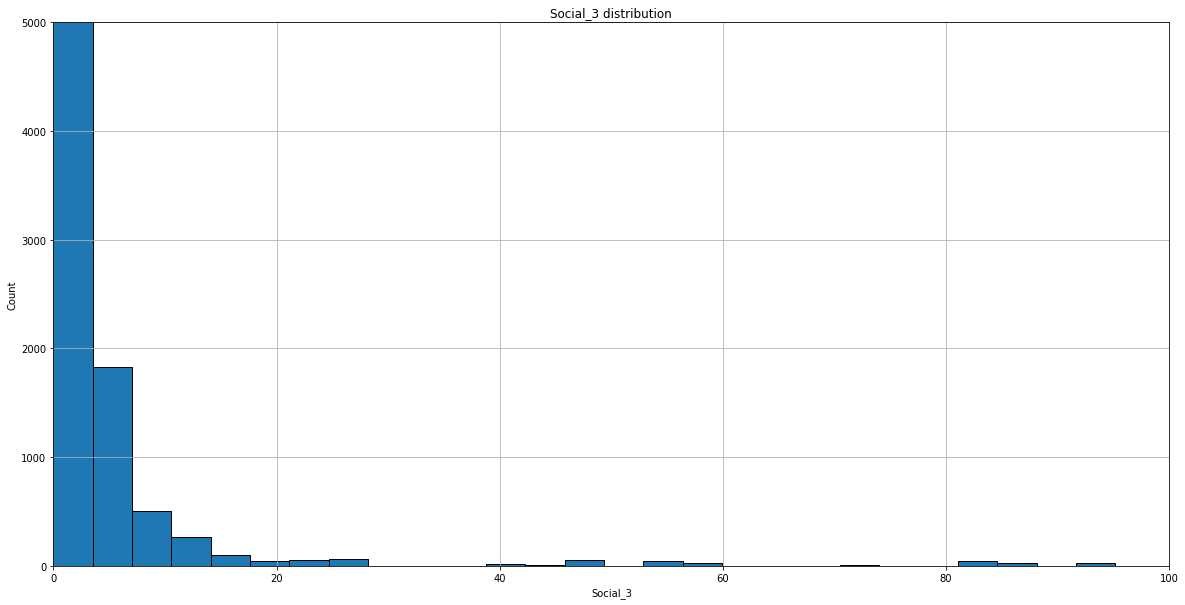

In [187]:

plt.figure (figsize=(20,10))
plt.axis([0,100,0,5000])

train_df['Social_3'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('Social_3')

plt.title ('Social_3 distribution')
# print(hist_info)
plt.show()

In [188]:
median_s_3 = train_df['Social_3'].median()
# train_df.loc[train_df['Social_3']<1,'Social_3'] =median_s_3
train_df.loc[train_df['Social_3']>30,'Social_3'] =median_s_3
# train_df['Social_3'].describe()

In [189]:

# train_df.loc[train_df['Social_3']<1,'Social_3'] =median_s_3
test_df.loc[test_df['Social_3']>30,'Social_3'] =median_s_3
# test_df['Social_3'].describe()

### Healthcare

#### 1

In [190]:
# train_df['Healthcare_1'] = train_df['Healthcare_1'].fillna(0)
# # train_df['Healthcare_1'].describe()
# test_df['Healthcare_1'] = test_df['Healthcare_1'].fillna(0)

train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()

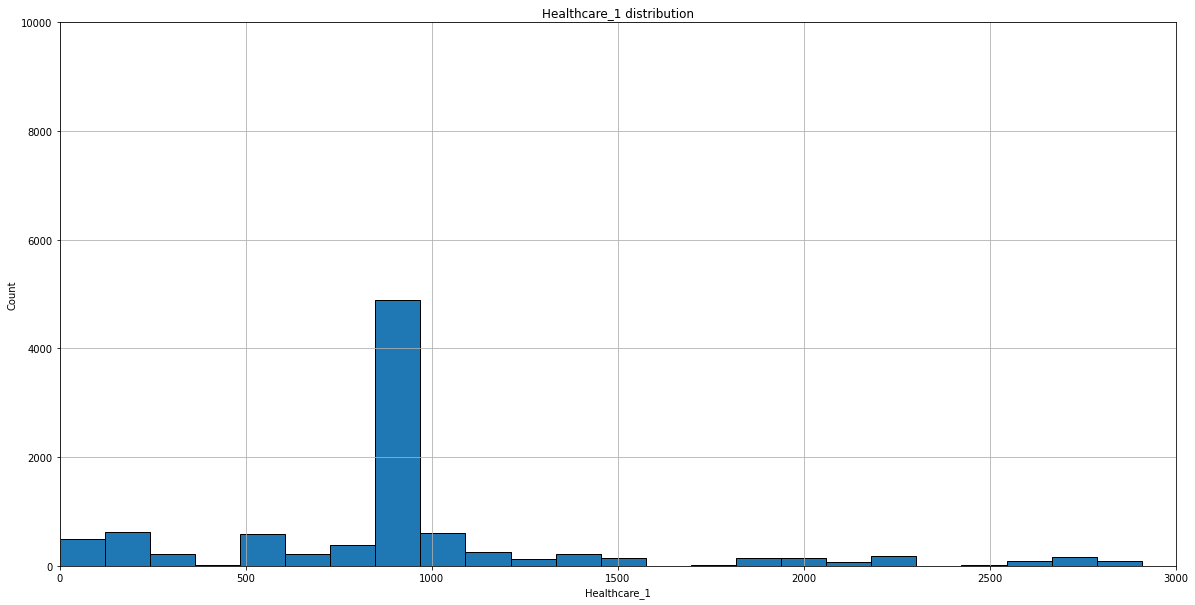

In [191]:
plt.figure (figsize=(20,10))
plt.axis([0,3000,0,10000])

train_df['Healthcare_1'].hist(bins = 40, edgecolor = 'black')


plt.ylabel('Count')
plt.xlabel('Healthcare_1')

plt.title ('Healthcare_1 distribution')
# print(hist_info)
plt.show()

In [192]:
# median_HC_1 = train_df['Healthcare_1'].median()
# train_df.loc[train_df['Healthcare_1']<10,'Healthcare_1'] =median_HC_1
# train_df.loc[train_df['Healthcare_1']>700,'Healthcare_1'] =median_HC_1
# # train_df['Healthcare_1'].describe()
# test_df.loc[test_df['Healthcare_1']<10,'Healthcare_1'] =median_HC_1
# test_df.loc[test_df['Healthcare_1']>700,'Healthcare_1'] =median_HC_1

#### 2

In [193]:
# plt.figure (figsize=(20,10))


# train_df['Helthcare_2'].hist(bins = 40, edgecolor = 'black')


# plt.ylabel('Count')
# plt.xlabel('Helthcare_2')

# plt.title ('Helthcare_2 distribution')
# # print(hist_info)
# plt.show()

In [194]:
train_df['Helthcare_2'] = train_df['Helthcare_2'].fillna(0)
median_HC_2 = train_df['Helthcare_2'].median()
train_df.loc[train_df['Helthcare_2']==0,'Helthcare_2'] =median_HC_2
# train_df.loc[train_df['Helthcare_2']>3,'Helthcare_2'] =median_HC_2

test_df['Helthcare_2'] = test_df['Helthcare_2'].fillna(0)

test_df.loc[test_df['Helthcare_2']==0,'Helthcare_2'] =median_HC_2

In [195]:
test_df['Helthcare_2'].describe()

count    5000.0000
mean        1.7386
std         1.1521
min         1.0000
25%         1.0000
50%         1.0000
75%         2.0000
max         6.0000
Name: Helthcare_2, dtype: float64

In [196]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int32  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Social_1       5000 non-null   int64  
 11  Social_2       5000 non-null   int64  
 12  Social_3       5000 non-null   int64  
 13  Healthcare_1   5000 non-null   float64
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  shops_distr    5000 non-null   int32  
 17  Ecology_2_A    5000 non-null   uint8  
 18  Ecology_

In [197]:
train_df.tail(1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,DistritSize,square_per_meter,Unionsqare,index_square,PSA_social1_2
9999,7202,94,2.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,...,1,0,1,0,1,89,4961.140965,1,5.969246,-0.151297


In [198]:
corr_matrix = train_df.corr().round(2)
corr_matrix

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,DistritSize,square_per_meter,Unionsqare,index_square,PSA_social1_2
Id,1.00,0.01,-0.01,-0.01,-0.01,0.01,0.00,-0.01,0.00,0.02,...,0.00,0.01,-0.01,-0.00,0.00,-0.01,0.01,-0.02,-0.01,0.01
DistrictId,0.01,1.00,0.07,-0.03,-0.15,0.15,-0.12,-0.26,-0.20,0.07,...,-0.09,0.03,-0.03,0.02,-0.02,-0.52,0.39,-0.09,-0.21,-0.06
Rooms,-0.01,0.07,1.00,0.68,0.49,0.15,0.01,-0.01,0.01,-0.03,...,0.00,-0.01,0.01,0.02,-0.02,-0.09,-0.03,0.28,0.30,-0.03
Square,-0.01,-0.03,0.68,1.00,0.72,0.22,0.12,0.18,0.19,-0.07,...,0.03,-0.02,0.02,0.06,-0.06,0.06,-0.20,0.42,0.57,0.03
LifeSquare,-0.01,-0.15,0.49,0.72,1.00,-0.06,0.14,0.21,0.13,-0.07,...,0.04,-0.06,0.06,0.06,-0.06,0.25,-0.30,0.53,0.62,0.09
KitchenSquare,0.01,0.15,0.15,0.22,-0.06,1.00,0.06,0.11,0.27,0.00,...,0.01,0.04,-0.04,0.01,-0.01,-0.20,0.16,-0.11,-0.56,-0.06
Floor,0.00,-0.12,0.01,0.12,0.14,0.06,1.00,0.53,0.28,-0.02,...,0.05,-0.03,0.03,0.01,-0.01,0.10,0.02,0.04,0.08,0.07
HouseFloor,-0.01,-0.26,-0.01,0.18,0.21,0.11,0.53,1.00,0.48,-0.05,...,0.09,-0.05,0.05,0.06,-0.06,0.26,-0.11,0.05,0.13,0.10
HouseYear,0.00,-0.20,0.01,0.19,0.13,0.27,0.28,0.48,1.00,-0.07,...,0.08,-0.05,0.05,0.06,-0.06,0.20,-0.16,-0.01,-0.02,0.04
Ecology_1,0.02,0.07,-0.03,-0.07,-0.07,0.00,-0.02,-0.05,-0.07,1.00,...,-0.11,0.22,-0.22,-0.08,0.08,-0.17,-0.01,-0.03,-0.07,0.14


### Построение модели

In [199]:
feat = [ 'Rooms', 'Square', 'KitchenSquare', 'Floor', 'HouseYear',
                 'Ecology_1', 'PSA_social1_2', 'Social_3',
                 'Healthcare_1',	'Helthcare_2', 'DistritSize']
# 


In [200]:
# feat = ['shops_distr','Rooms',	'Square',	'KitchenSquare',	'Floor',	'Ecology_1','Helthcare_2',	'PSA_social1_2',	'Ecology_2_A',	'Ecology_2_B',	'Ecology_3_A',	'Ecology_3_B',	'Shops_2_A','Shops_2_B', 'Social_2']
#  0.615 feat = ['DistrictId',  'Rooms',	'Square', 'Social_1', 'Social_2',	'Healthcare_1',	'Helthcare_2',	'Shops_1',	'Ecology_2_A',	'Ecology_2_B',	'Ecology_3_A',	'Ecology_3_B',	'Shops_2_A','Shops_2_B']
# 0.620  all
# feat = ['DistrictId',  'Rooms',	'Square',	'KitchenSquare',	'Floor',	'Ecology_1',	'Social_1',	'Social_2',	'Healthcare_1',	'Helthcare_2',	'Shops_1',	'Ecology_2_A',	'Ecology_2_B',	'Ecology_3_A',	'Ecology_3_B',	'Shops_2_A','Shops_2_B', 'Social_2', 'shops_distr',	'PSA_social1_2']
# feat = ['DistrictId',  'Rooms',	'Square',	'KitchenSquare',	'Floor',	'Ecology_1',	'Social_1',	'Social_2',	'Healthcare_1',	'Helthcare_2',	'Shops_1',	'Ecology_2_A',	'Ecology_2_B',	'Ecology_3_A',	'Ecology_3_B',	'Shops_2_A','Shops_2_B', 'Social_2', 'shops_distr',	'PSA_social1_2','DistritSize', 'index_square','Unionsqare' ]
# 0.65 feat = ['DistrictId', 'Rooms', 'Square', 'KitchenSquare', 'Floor', 'HouseYear',
#                  'Ecology_1', 'Social_1', 'Social_3',
#                  'Healthcare_1',	'Helthcare_2']
# feat = ['DistrictId', 'Rooms', 'Square', 'KitchenSquare', 'Floor', 'HouseYear',
#                  'Ecology_1', 'PSA_social1_2', 'Social_3',
#                  'Healthcare_1',	'Helthcare_2', 'DistritSize']


x = train_df [feat]
y = train_df['Price']
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size=0.3, random_state=21)


### Линейная регрессия

In [201]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [202]:
lr.fit (x_train,y_train)

LinearRegression()

In [203]:
y_pred_1 = lr.predict(x_valid)
y_pred_1

array([ 87772.77911282, 228631.21596815, 193740.76307186, ...,
       226766.08231599, 135691.36315239, 196660.87445068])

In [204]:
#check_test = pd.DataFrame({'y_valid':y_valid['Price'],y_pred_1: y_pred_1.flatten()}, columns = ['y_valid','y_pred_1'])
y_pred_tr = lr.predict(x_train)
y_pred_tr

array([335033.94753423, 158442.94736905, 231508.45896231, ...,
       190500.1703874 , 144016.56869045, 254186.8128482 ])

In [205]:
r2_lr = r2_score(y_pred_1, y_valid)
r2_lr


0.26923330883009033

In [206]:
r2_lr_train = r2_score(y_pred_tr, y_train)
r2_lr_train

0.22856240570268227

In [207]:
scaler = StandardScaler()
x_train_scl = scaler.fit_transform(x_train)
x_train_scl = pd.DataFrame(x_train_scl, columns=x_train.columns)
 

In [208]:
scaler = StandardScaler()
x_valid_scl = scaler.fit_transform(x_valid)
x_valid_scl = pd.DataFrame(x_valid_scl, columns=x_valid.columns)

In [209]:
lr.fit(x_train_scl, y_train)
y_pred_4 = lr.predict(x_valid_scl)
r2_lr = r2_score(y_pred_4, y_valid)
r2_lr

0.24902836188904776

<BarContainer object of 11 artists>

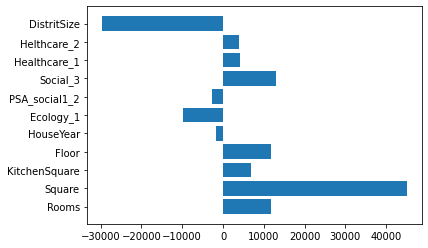

In [210]:
# проверяем и удаляем признаки с практически нулевыми весами.
plt.barh(x_train.columns, lr.coef_.flatten())

### RandomForestRegressor

In [211]:
forest = RandomForestRegressor(random_state=42, n_estimators=200)
forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [212]:
y_pred_2 = forest.predict(x_valid)
y_pred_3 = forest.predict(x_train)

In [213]:
r2_fr_train = r2_score(y_pred_3, y_train)
r2_fr_train

0.95369541799726

In [214]:
r2_fr = r2_score(y_pred_2, y_valid)
r2_fr

0.6677527074630579

# Prediction

In [215]:
from sklearn.ensemble import GradientBoostingRegressor
final_model = GradientBoostingRegressor(random_state=42, n_estimators=200, max_depth=5)
final_model.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [216]:
y_train_preds = final_model.predict(x_train)
y_test_preds = final_model.predict(x_valid)

In [217]:
r2_gb = r2_score(y_pred_2, y_valid)
r2_gb

0.6677527074630579

In [218]:
forest.fit(x,y)
y_pred_fin = forest.predict(test_df[feat])



In [219]:
result = pd.DataFrame()
result['Id'] = test_df['Id'].copy()
result['Price'] = pd.Series(y_pred_fin)

In [220]:
result.to_csv('kachusova_prediction.csv', index=False)
result.values

array([[  4567.        , 150769.13264932],
       [  5925.        , 184552.1631083 ],
       [   960.        , 186850.42907867],
       ...,
       [  3912.        , 143493.73918599],
       [  5722.        , 192386.74780056],
       [ 11004.        , 285710.6430361 ]])